<a href="https://colab.research.google.com/github/BKN1810/DeepLearning/blob/master/NepaliDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install the dependencies
!pip install kaggle 

In [2]:
from google.colab import files
files.upload() # load kaggle.json file from your computer

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"balnyaupane","key":"94d1788aa9bc4a93a4047e845cf4bd18"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d balnyaupane/nepali-digit-28-by-28-images -p /content

 68% 5.00M/7.40M [00:01<00:00, 4.00MB/s]
100% 7.40M/7.40M [00:01<00:00, 5.67MB/s]


In [5]:
!unzip -uq "/content/nepali-digit-28-by-28-images.zip" -d "/content/Dataset"

In [6]:
from keras.models import Sequential
from keras.layers import Convolution2D, ZeroPadding2D ,BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout

Using TensorFlow backend.


In [7]:
classifier = Sequential()

#step1-convolution
classifier.add(Convolution2D(128,(3,3),input_shape=(28,28,1),activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2,2)))
classifier.add(Dropout(0.4))


#adding second Convolution layer
classifier.add(Convolution2D(256,(3,3),activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

#adding third Convolution layer
classifier.add(Convolution2D(256,(3,3),activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2,2)))
classifier.add(Dropout(0.4))

#adding fourth Convolution layer
classifier.add(Convolution2D(256,(3,3),activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2,2)))
classifier.add(Dropout(0.5))


#step3-flattening
classifier.add(Flatten())

#step4-full connection
classifier.add(Dense(activation='relu',units=128))
classifier.add(Dropout(0.2))

classifier.add(Dense(activation='relu',units=256))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))


classifier.add(Dense(activation='relu',units=128))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

classifier.add(Dense(activation='relu',units=128))
classifier.add(BatchNormalization())


classifier.add(Dense(activation='softmax',units=10))

In [8]:
#compiling the cnn
classifier.compile(optimizer='adam' , loss='categorical_crossentropy',metrics=['accuracy'])

#part2- fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/Dataset/nepali_digit_28_by_28_images/train_set',
        target_size=(28, 28),
        batch_size=64,
        color_mode='grayscale',
        class_mode='categorical')

print("training_set.class_indices:   ",training_set.class_indices)

test_set = test_datagen.flow_from_directory('/content/Dataset/nepali_digit_28_by_28_images/test_set',
        target_size=(28, 28),
        batch_size=64,
        color_mode='grayscale',
        class_mode='categorical')

print("test_set.class_indices:   ",test_set.class_indices)

# summarize model.
classifier.summary()

Found 5820 images belonging to 10 classes.
training_set.class_indices:    {'digit_0': 0, 'digit_1': 1, 'digit_2': 2, 'digit_3': 3, 'digit_4': 4, 'digit_5': 5, 'digit_6': 6, 'digit_7': 7, 'digit_8': 8, 'digit_9': 9}
Found 3850 images belonging to 10 classes.
test_set.class_indices:    {'digit_0': 0, 'digit_1': 1, 'digit_2': 2, 'digit_3': 3, 'digit_4': 4, 'digit_5': 5, 'digit_6': 6, 'digit_7': 7, 'digit_8': 8, 'digit_9': 9}
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)     

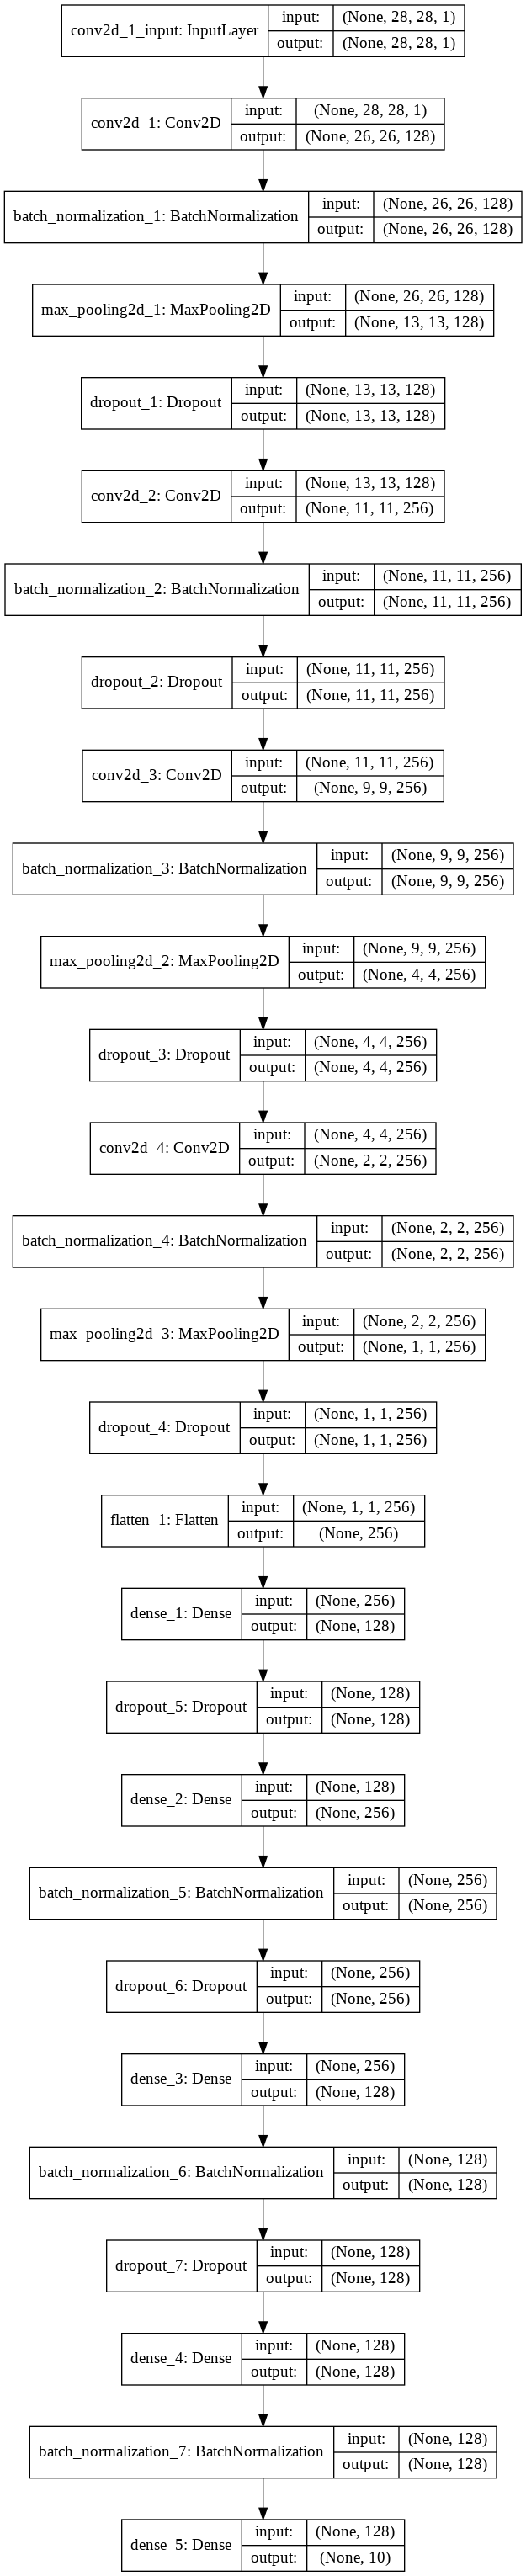

In [9]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
History=classifier.fit_generator(training_set,
        steps_per_epoch=91,
        epochs=100,
        validation_data=test_set,
        validation_steps=61)

Epoch 1/100
91/91 [==============================] - 16s 180ms/step - loss: 2.4895 - accuracy: 0.1653 - val_loss: 3.6500 - val_accuracy: 0.1000
Epoch 2/100
91/91 [==============================] - 8s 90ms/step - loss: 1.9404 - accuracy: 0.2777 - val_loss: 3.1788 - val_accuracy: 0.1000
Epoch 3/100
91/91 [==============================] - 8s 92ms/step - loss: 1.5708 - accuracy: 0.4005 - val_loss: 3.5298 - val_accuracy: 0.1091
Epoch 4/100
91/91 [==============================] - 8s 88ms/step - loss: 1.3462 - accuracy: 0.5060 - val_loss: 3.2164 - val_accuracy: 0.1195
Epoch 5/100
91/91 [==============================] - 8s 90ms/step - loss: 1.1130 - accuracy: 0.6067 - val_loss: 2.0452 - val_accuracy: 0.2862
Epoch 6/100
91/91 [==============================] - 8s 90ms/step - loss: 0.9741 - accuracy: 0.6584 - val_loss: 2.3501 - val_accuracy: 0.4468
Epoch 7/100
91/91 [==============================] - 8s 90ms/step - loss: 0.8534 - accuracy: 0.7009 - val_loss: 0.7284 - val_accuracy: 0.5857
Epoc

In [11]:
# list all data in history
print(History.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


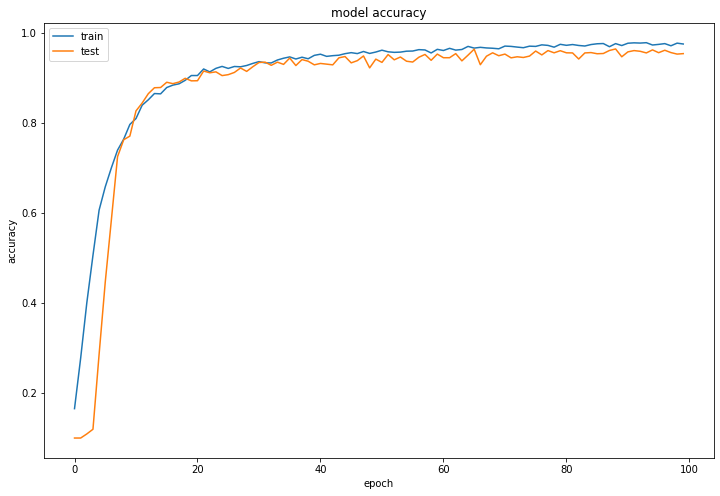

In [12]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

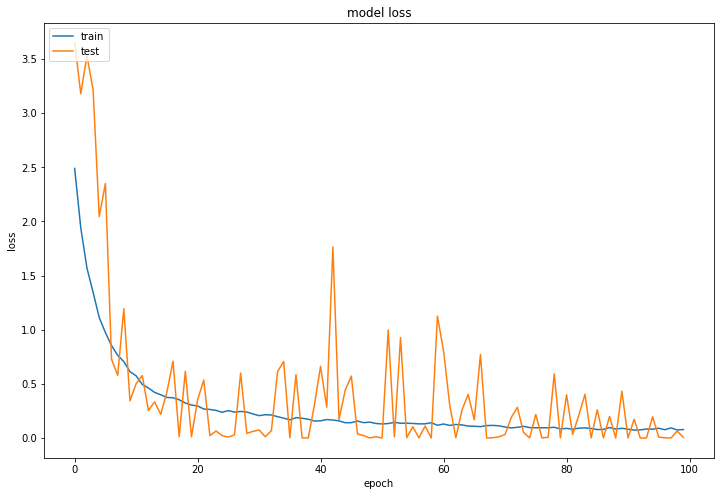

In [13]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# Import dependencies
import json
from keras.models import model_from_json, load_model

# Save Weights + Architecture
classifier.save_weights('pneumoniaUsingCNN_weights.h5')
with open('pneumoniaUsingCNN_architecture.json', 'w') as f:
    f.write(classifier.to_json())

In [15]:
# Load Weights + Architecture
with open('pneumoniaUsingCNN_architecture.json', 'r') as f:
    loaded_model = model_from_json(f.read())
loaded_model.load_weights('pneumoniaUsingCNN_weights.h5')

In [16]:
#compiling the cnn
loaded_model.compile(optimizer='adam' , loss='categorical_crossentropy',metrics=['accuracy'])

loaded_model.evaluate_generator(training_set,max_queue_size=10,workers=1,use_multiprocessing=False,verbose=1)
loaded_model.evaluate_generator(test_set,max_queue_size=10,workers=1,use_multiprocessing=False,verbose=1)
print(loaded_model.metrics_names)


61/61 [==============================] - 2s 28ms/step
['loss', 'accuracy']


Confusion Matrix
 Classification report 
              precision    recall  f1-score   support

           0       0.10      0.10      0.10       385
           1       0.09      0.09      0.09       385
           2       0.09      0.09      0.09       385
           3       0.10      0.09      0.10       385
           4       0.10      0.10      0.10       385
           5       0.08      0.08      0.08       385
           6       0.11      0.11      0.11       385
           7       0.11      0.11      0.11       385
           8       0.10      0.10      0.10       385
           9       0.10      0.10      0.10       385

    accuracy                           0.10      3850
   macro avg       0.10      0.10      0.10      3850
weighted avg       0.10      0.10      0.10      3850



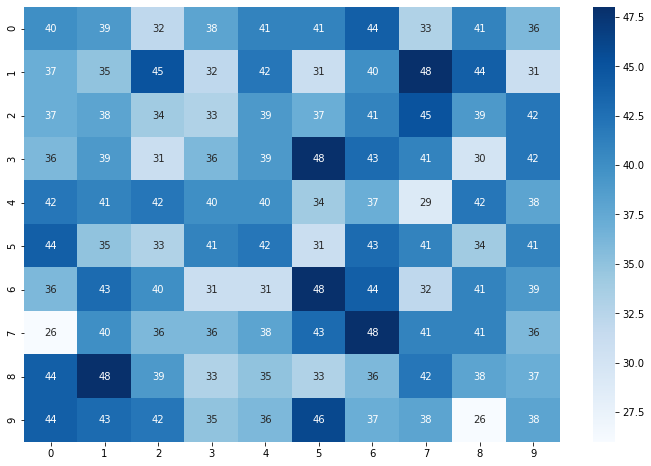

In [18]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

test_set.classes

Y_pred = loaded_model.predict_generator(test_set)

y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cnf_matrix=confusion_matrix(test_set.classes, y_pred)

cnf_report=classification_report(test_set.classes, y_pred)
print(" Classification report ")
print(cnf_report)

import seaborn as sns
#sns.heatmap(cnf_matrix, annot=True)
sns.heatmap(cnf_matrix, annot=True,cmap='Blues')

In [21]:
#single prediction
import numpy as np
import cv2
from keras.preprocessing import image

test_image=image.load_img('/content/Dataset/nepali_digit_28_by_28_images/test_set/digit_6/030_01.jpg',target_size=(28,28),color_mode='grayscale')
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image)
print(result)
print(np.argmax(result, axis=1))
result.size

[[1.0630200e-25 1.8906625e-10 3.4392455e-23 0.0000000e+00 0.0000000e+00
  0.0000000e+00 8.0359596e-24 1.9075459e-21 1.3898405e-08 1.0000000e+00]]
[9]


10